In [1]:
import os
import numpy as np

from noah2 import data as D
from noah2 import util as U

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [4]:
DNoah = D.Noah2()
fema = DNoah._read_data_full(participants=True)
covars = DNoah.data[:,1:]

In [7]:
covars[:,2] = np.log10(covars[:,2])
covars[:,3] = np.log10(covars[:,3])

In [6]:
metro = ((fema['RUCA1'] == 1))# | (fema['RUCA1'] == 2) | (fema['RUCA1'] == 3)) 
micro = ((fema['RUCA1'] == 4) | (fema['RUCA1'] == 5) | (fema['RUCA1'] == 6))
small = ((fema['RUCA1'] == 7) | (fema['RUCA1'] == 8) | (fema['RUCA1'] == 9))
rural = ((fema['RUCA1'] == 10))

# rural

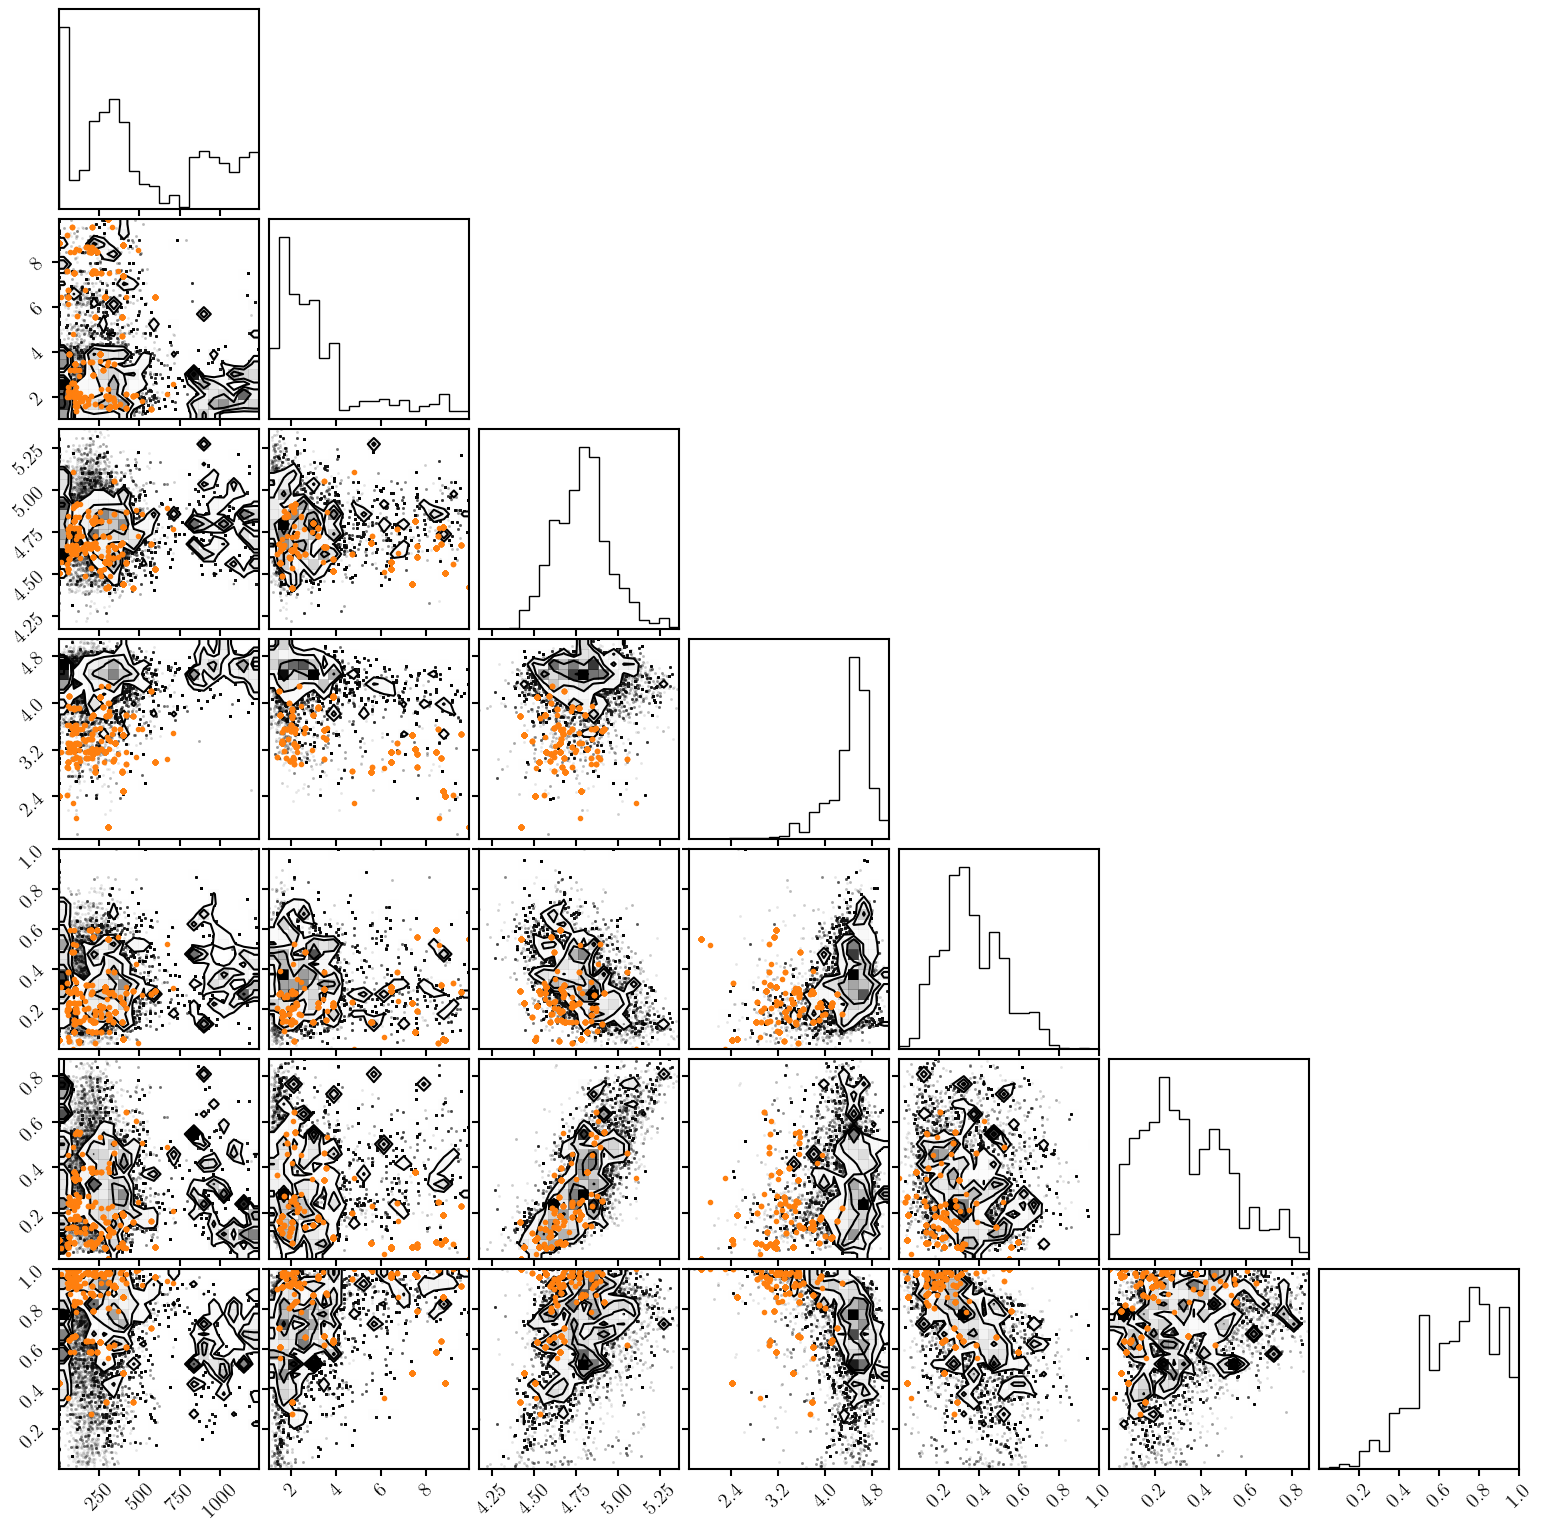

In [15]:
fig = DFM.corner(covars[:,:7], color='k')
DFM.overplot_points(fig, covars[:,:7][rural], color='C1')

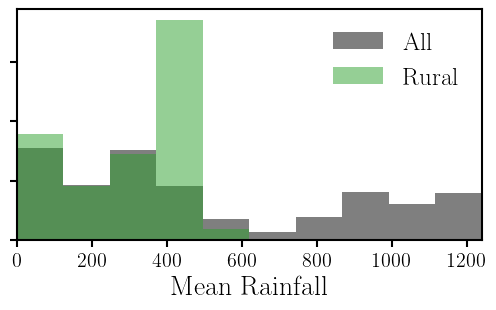

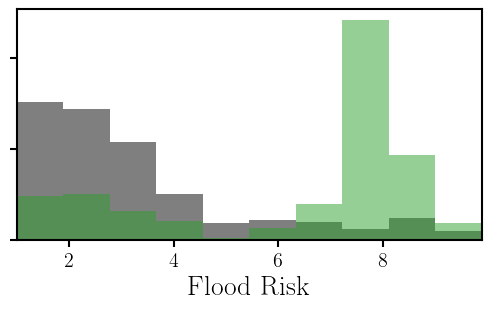

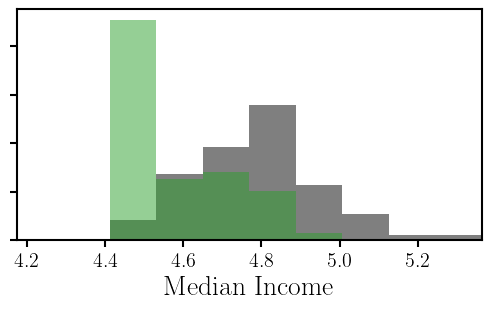

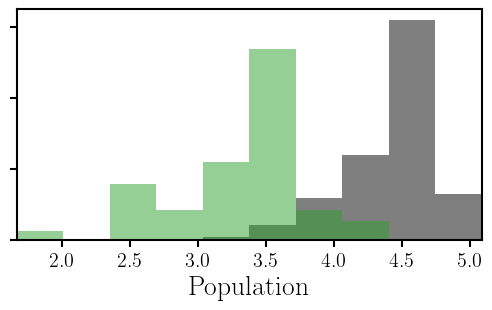

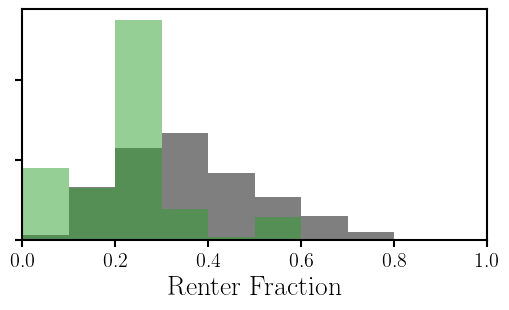

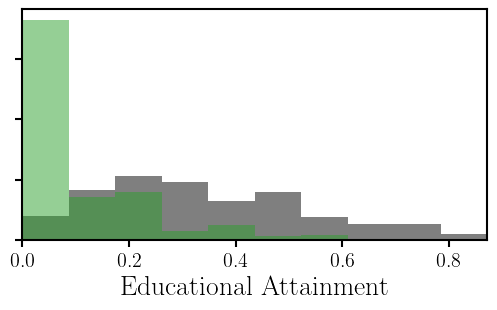

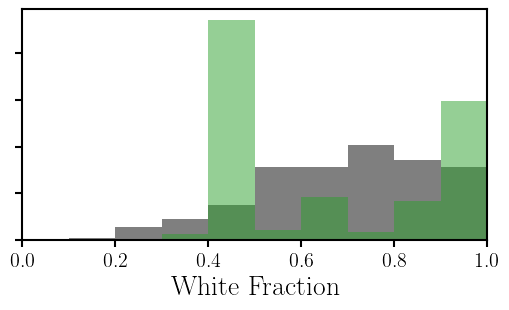

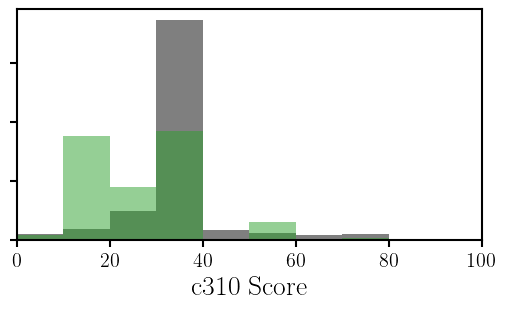

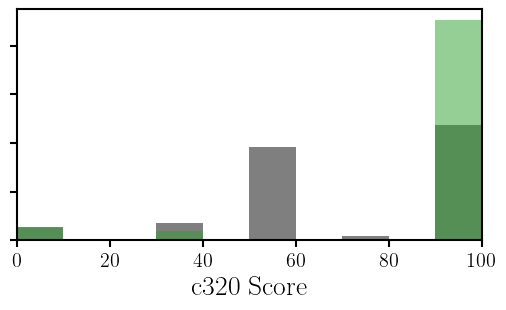

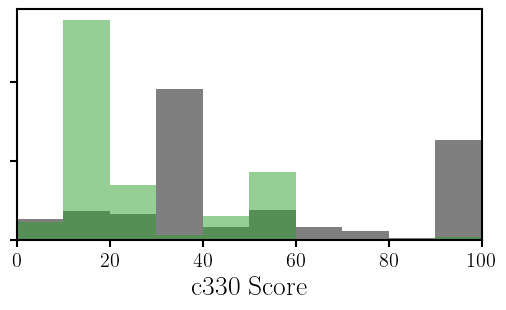

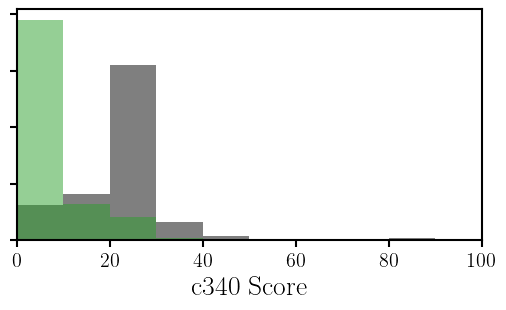

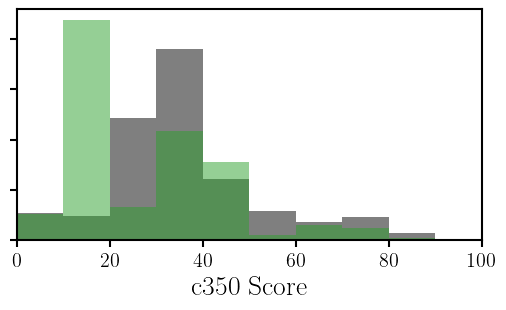

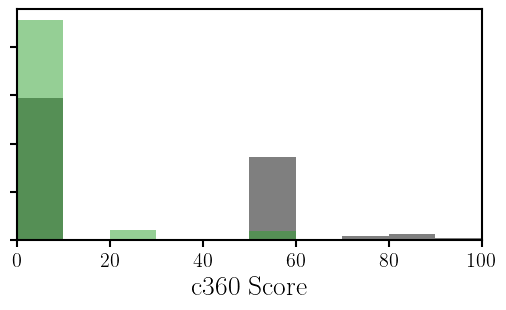

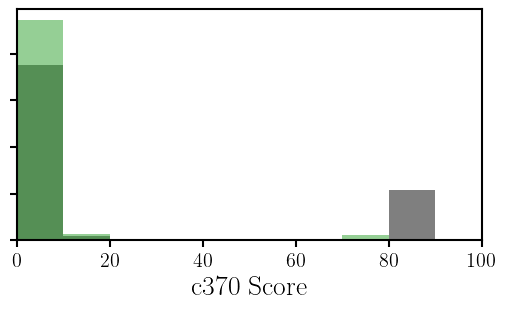

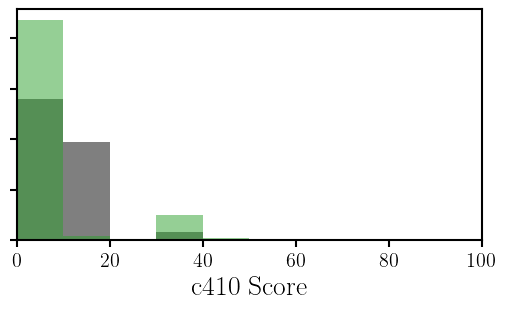

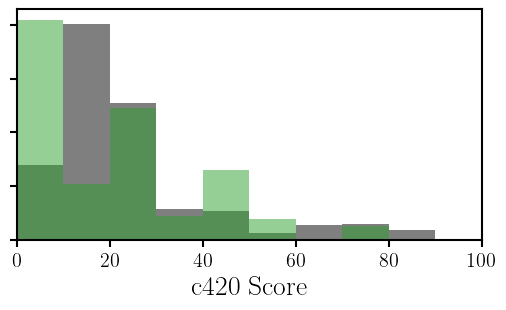

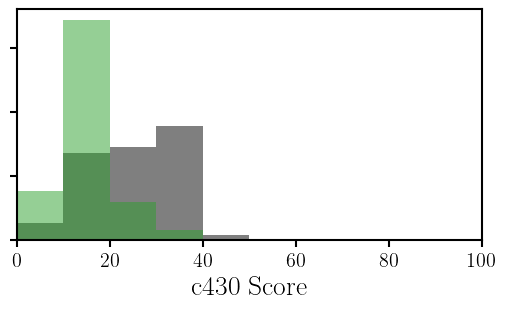

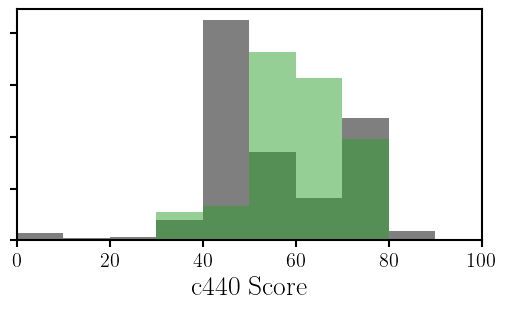

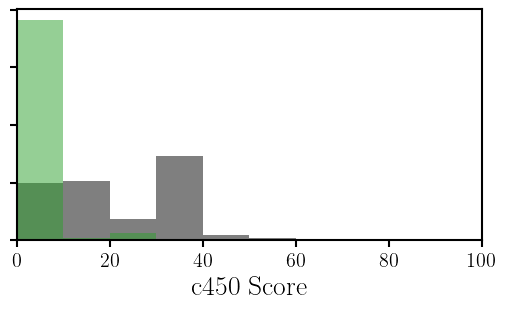

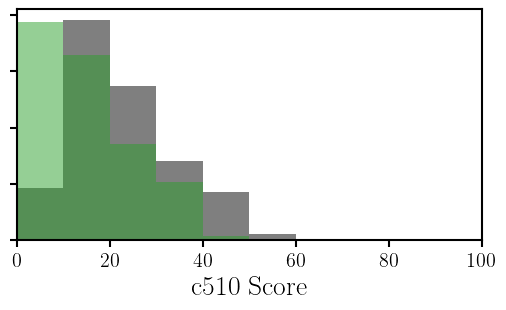

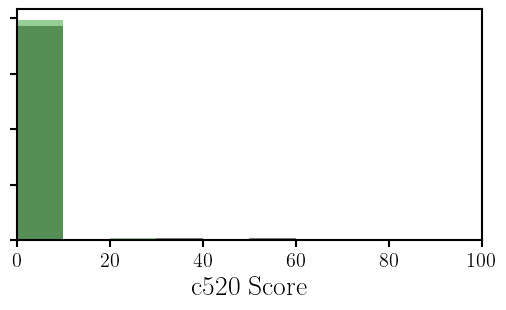

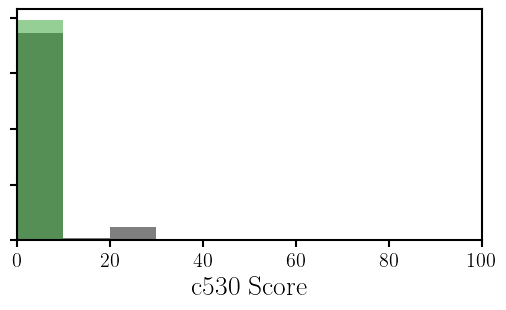

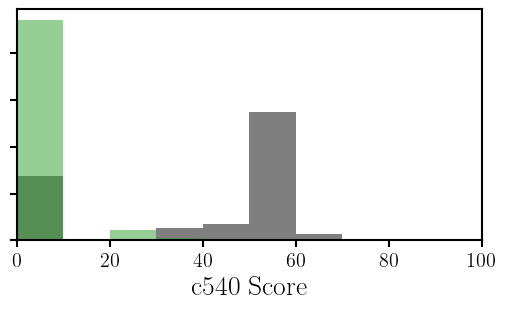

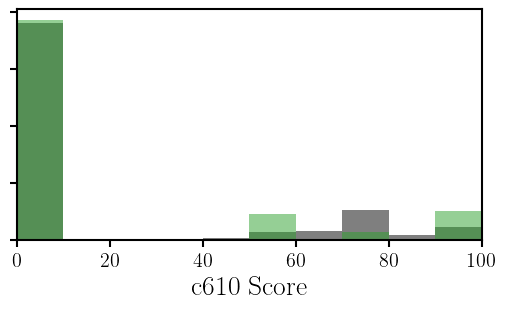

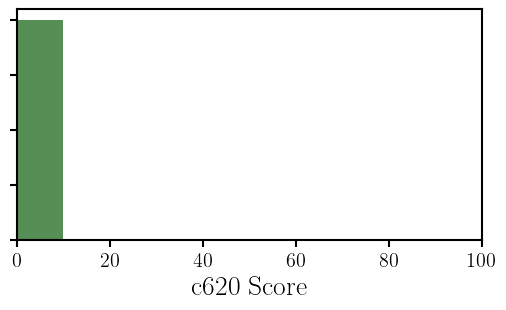

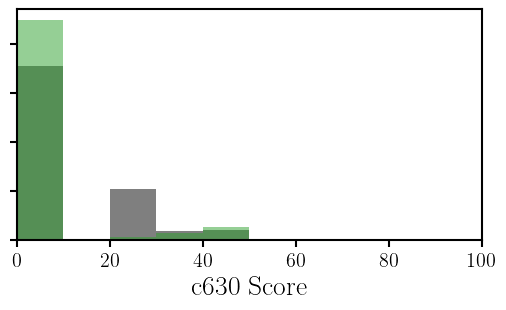

In [23]:
for i in range(covars.shape[1]): 
    xrange = covars[:,i].min(), covars[:,i].max()
    
    fig = plt.figure(figsize=(6,3))
    sub = fig.add_subplot(111)
    _ = sub.hist(covars[:,i], bins=10, color='k', range=xrange, density=True, alpha=0.5, label='All')
    _ = sub.hist(covars[:,i][rural], bins=10, color='C2', range=xrange, density=True, alpha=0.5, label='Rural') 
    if i == 0: sub.legend(loc='upper right', fontsize=18)
    sub.set_xlabel(DNoah._column_labels()[i+1], fontsize=20)
    sub.set_xlim(xrange)
    sub.set_yticklabels([])
    plt.show()